In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
survey = pd.read_csv('/content/drive/MyDrive/BDA_CSV/survey_설문지.csv')

In [ ]:
survey

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(AA역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2
83,2019-01-09,공원에 놀이기구가 너무 적다,1
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2


In [ ]:
survey.info() #결측값이 있는지 확인해본다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datetime      86 non-null     object
 1   comment       84 non-null     object
 2   satisfaction  86 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.1+ KB


In [ ]:
survey.dropna(inplace = True) #결측값 삭제

In [ ]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 85
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datetime      84 non-null     object
 1   comment       84 non-null     object
 2   satisfaction  84 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.6+ KB


In [ ]:
survey['comment']= survey['comment'].str.replace('[A-Za-z]',"",regex = True)
#정규표현식을 이용하여 comment컬럼에 있는 영어를 삭제한다.

In [ ]:
survey['comment'] = survey['comment'].str.replace('\(.+?\)',"",regex = True)
#정규표현식을 이용하여 comment컬럼의 기호문자들을 삭제한다.

In [ ]:
survey

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다,1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다,4
4,2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2
83,2019-01-09,공원에 놀이기구가 너무 적다,1
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2


## 판다스에서 제공하는 str문법
- str.split()
- str.get()
- str.startswidth()
- str.endswith()
- str.contains()
- str.replace()
- str.extract()
- str.pad()
- str.strip()
- str.lower / str.upper
- str.match

In [ ]:
survey['len'] = survey['comment'].str.len()
# comment컬럼의 글자수를 이용하여 len컬럼 생성

In [ ]:
survey

,datetime,comment,satisfaction,len
0,2019-03-11,역앞에 젊은이들이 모여있다,1,14
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5,21
2,2019-02-18,육아 지원이 좋다,5,9
3,2019-04-09,어린이집에 바로 입원할 수 있다,4,17
4,2019-01-06,역앞 상가가 쓸쓸하다,2,11
...,...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5,22
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2,26
83,2019-01-09,공원에 놀이기구가 너무 적다,1,15
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2,14


(array([20., 19., 20., 10.,  7.,  3.,  4.,  0.,  0.,  1.]),
 array([ 6. , 11.6, 17.2, 22.8, 28.4, 34. , 39.6, 45.2, 50.8, 56.4, 62. ]),
 <BarContainer object of 10 artists>)

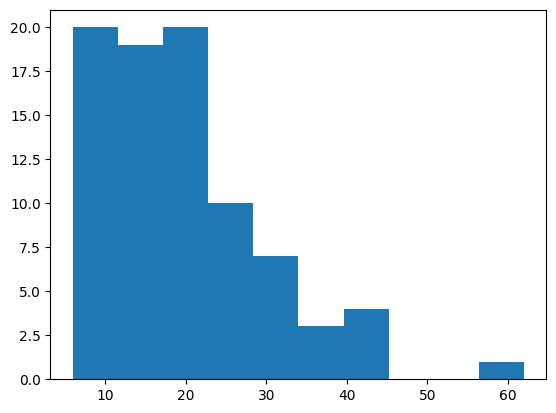

In [ ]:
import matplotlib.pyplot as plt
plt.hist(survey['len'])
#히스토그램을 이용하여 글자수의 분포 확인

## 형태소 분석
- 자연어 처리에서 필수적으로 진행하는 과정
- 형태소 -> 의미를 가지는 요소러서 더이상 분석할 수 없는 가장 작은 말의 단위
- 토큰화 -> 문장을 형태소 단위로 나눠서 쪼개는 과정
- 오늘은 날씨가 좋다 -> 오/늘/은/날/씨/가/좋/다.(음절로 나눈 결과)
- 오늘은 날씨가 좋다 -> 오늘/은/날씨/가/좋다.(형태소 단위로 나눈 결과)
- 토큰화를 하는 이유
- 문장의 구조 파악 : 문장 간의 관계나 문장 내의 구성 요소 등을 분석하는데 도움
- 단어 수준 분석 : 단어의 빈도, 문맥, 의미 등을 분석하는데 도움
- 형태소 분석 : 단어의 원형, 품사, 문법적 관계 등을 파악하여 자연어 이해 및 처리에 도움
- 텍스트 전처리 : 토큰화를 통해 작은 단위로 나누어 분석 알고리즘에 적용하는데 도움
- 불용어 : 분석에 있어서 큰 의미를 갖지  않거나 일반적으로 많이 사용되는 단어(조사 등)
- 불용어 처리 이유 -> 처리 속독 향상 / 메모리 절약 / 모델 성능 향상

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [734 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [108 kB]
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [731 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 1,802 kB in 2s (1,136 kB/s)
Reading package lists...
Reading package lists...
Building dependency tree...
Reading state information...
Package python-dev is not available, but is referred to by another package.
Thi

E: Package 'python-dev' has no installation candidate


In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
from konlpy.tag import Okt
from konlpy.tag import Twitter

In [ ]:
twt = Twitter()
text = '주피터로 하려다가 에러가 너무 많아서 코랩으로 바꿨어요.'
tagging = twt.pos(text)
tagging

/usr/local/lib/python3.10/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('주피터', 'Noun'),
 ('로', 'Josa'),
 ('하려다가', 'Verb'),
 ('에러', 'Noun'),
 ('가', 'Josa'),
 ('너무', 'Adverb'),
 ('많아서', 'Adjective'),
 ('코랩', 'Noun'),
 ('으로', 'Josa'),
 ('바꿨어요', 'Verb'),
 ('.', 'Punctuation')]

In [ ]:
survey

,datetime,comment,satisfaction,len
0,2019-03-11,역앞에 젊은이들이 모여있다,1,14
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5,21
2,2019-02-18,육아 지원이 좋다,5,9
3,2019-04-09,어린이집에 바로 입원할 수 있다,4,17
4,2019-01-06,역앞 상가가 쓸쓸하다,2,11
...,...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5,22
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2,26
83,2019-01-09,공원에 놀이기구가 너무 적다,1,15
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2,14


In [ ]:
all_words= [] #빈 리스트에 추가하기 위해서 생성
parts = ['Noun'] #명사들만 추출하기위한 설정
for i in range(len(survey)):
  text = survey['comment'].iloc[i] #comment컬럼에 있는 자료를 문장으로 설정
  words = twt.pos(text) #(형태소,품사)의 형태로 전환
  words_arr = []
  for w in words:
    if w == 'EOS' or w == '':continue # EOS : end of sentence
    words_tmp = w[0] #형태소
    part = w[1] #품사
    if not (part in parts):continue
    words_arr.append(words_tmp)
  all_words.extend(words_arr)
print(all_words)


['역앞', '젊은이', '운동', '수', '장소', '것', '육아', '지원이', '어린이집', '바로', '입원', '수', '역앞', '상가', '생활', '놀', '장소', '놀', '장소', '상업시설', '좀', '더', '병원', '사이클링', '코스', '축제', '좀', '더', '성대', '초등학교', '공원', '더', '근처', '공원', '살기', '슈퍼', '육아', '데이트', '명소', '상가', '좀', '더', '밤길', '쓰레기', '처리', '영화관', '가로수', '더', '공원', '추가', '관광', '명소', '육아', '최고', '길이', '시내', '접근성', '집세', '합리', '의', '교통', '체증', '게', '해', '상가', '지붕', '비', '큰일', '상가', '더', '카페', '스포츠', '센터', '자주', '이용', '스포츠', '센터', '이용', '요금', '워킹맘', '지원', '더', '버스', '별로', '안', '자전거', '달리기', '달리기', '운동', '수', '장소', '기업', '역앞', '주차장', '아저씨', '말', '적', '경찰', '순찰', '더', '소방', '활동', '수', '재난', '시', '피난', '장소', '것', '요즘', '강', '범람', '피해', '크게', '이', '도시', '범람', '방지', '취하', '설명', '신호등', '사거리', '때문', '사고', '신호', '상가', '활성화', '활동', '좀더', '행정', '뒷받침', '아이', '놀', '장소', '역앞', '자전거', '주차장', '가로수', '낙엽', '청소', '가로수', '재해', '시', '비축', '상황', '보도', '길이', '수', '지역', '자치', '단체', '더', '지원', '자치', '단체', '활동', '안심', '살', '수', '관광지', '최근', '지방', '넘버', '치안', '제대로', '주차장', '수가', '요금'

In [ ]:
all_words = []
parts= ['Josa'] # 조사들만 추출하기 위한 설정
for i in range(len(survey)):
    text = survey['comment'].iloc[i]
    words = twt.pos(text)
    words_arr =[]
    for n in words:
        if n =='EOS' or n =='':continue
        words_tmp=n[0]
        part = n[1]
        if not (part in parts):continue
        words_arr.append(words_tmp)
    all_words.extend(words_arr)
print(all_words)

['에', '이', '가', '이', '에', '가', '은', '한', '가', '가', '이', '이', '가', '를', '가', '이', '에', '이', '까지', '가', '를', '를', '이', '가', '이', '를', '을', '가', '이', '가', '이다', '을', '든', '에', '이', '가', '이다', '에', '를', '가', '하고', '의', '이', '의', '을', '가', '로', '가', '이', '에', '이', '가', '을', '이', '을', '이', '의', '가', '가', '에서는', '를', '고', '에', '이', '가', '에', '가', '를', '의', '을', '이', '가', '한', '가', '에', '이', '가', '의', '은', '가', '를', '의', '이', '하고', '가', '의', '은', '이', '에', '을', '가', '과', '를', '이', '에', '을', '의', '로', '을', '에', '이', '는', '이', '가', '를', '하고', '에', '가', '에', '가', '에', '를', '에', '가', '도', '를', '의', '가', '에', '를', '이', '이', '로', '가', '이', '가', '은', '에', '로', '가', '의', '이', '이', '이', '이라서', '에서도', '를', '에', '가', '을', '에', '이']


In [ ]:
all_words_df = pd.DataFrame({'words':all_words, 'count':len(all_words)*[1]}) #각 명사들의 개수 파악
all_words_df

,words,count
0,역앞,1
1,젊은이,1
2,운동,1
3,수,1
4,장소,1
...,...,...
278,놀이기구,1
279,공원,1
280,더,1
281,역앞,1


In [ ]:
all_words_df.groupby('words').sum() #같은 명사들끼리 묶어서 개수파악

,count
words,
가로수,3
강,1
거리,1
걱정,1
걸,1
...,...
확인,1
확장,1
활기,1


## 불용어 지우기
- 걸, 것, 게 지우기

In [ ]:
stop_words = ['걸','것','게'] #불용어 리스트로, 제외할 단어를 나타낸다.
all_words = [] #all_words에 단어 추가
parts = ['Noun'] #명사만 가져오겠다.
satisfaction = [] #satisfaction 리스트 초기화
for i in range(len(survey)):
  text = survey['comment'].iloc[i] #comment컬럼의 문장을 사용하겠다.
  words = twt.pos(text) #단어와 품사 추출
  words_arr = []
  for n in words:
    if n == 'EOS' or n == '':continue
    words_tmp=n[0]
    part = n[1]
    if not (part in parts):continue
    if words_tmp in stop_words:continue
    words_arr.append(words_tmp) #추출한 단어를 stop_words에 포함하지 않고 words_arr에 추가
    satisfaction.append(survey['satisfaction'].iloc[i]) #응답 만족도를 satisfaction에 추가
  all_words.extend(words_arr)
print(all_words)

all_words_df_f = pd.DataFrame({'words':all_words, 'satisfaction':satisfaction,
                               'count':len(all_words)*[1]})

['역앞', '젊은이', '운동', '수', '장소', '육아', '지원이', '어린이집', '바로', '입원', '수', '역앞', '상가', '생활', '놀', '장소', '놀', '장소', '상업시설', '좀', '더', '병원', '사이클링', '코스', '축제', '좀', '더', '성대', '초등학교', '공원', '더', '근처', '공원', '살기', '슈퍼', '육아', '데이트', '명소', '상가', '좀', '더', '밤길', '쓰레기', '처리', '영화관', '가로수', '더', '공원', '추가', '관광', '명소', '육아', '최고', '길이', '시내', '접근성', '집세', '합리', '의', '교통', '체증', '해', '상가', '지붕', '비', '큰일', '상가', '더', '카페', '스포츠', '센터', '자주', '이용', '스포츠', '센터', '이용', '요금', '워킹맘', '지원', '더', '버스', '별로', '안', '자전거', '달리기', '달리기', '운동', '수', '장소', '기업', '역앞', '주차장', '아저씨', '말', '적', '경찰', '순찰', '더', '소방', '활동', '수', '재난', '시', '피난', '장소', '요즘', '강', '범람', '피해', '크게', '이', '도시', '범람', '방지', '취하', '설명', '신호등', '사거리', '때문', '사고', '신호', '상가', '활성화', '활동', '좀더', '행정', '뒷받침', '아이', '놀', '장소', '역앞', '자전거', '주차장', '가로수', '낙엽', '청소', '가로수', '재해', '시', '비축', '상황', '보도', '길이', '수', '지역', '자치', '단체', '더', '지원', '자치', '단체', '활동', '안심', '살', '수', '관광지', '최근', '지방', '넘버', '치안', '제대로', '주차장', '수가', '요금', '역', '앞', '공공

In [ ]:
all_words_df_f

,words,satisfaction,count
0,역앞,1,1
1,젊은이,1,1
2,운동,5,1
3,수,5,1
4,장소,5,1
...,...,...,...
274,놀이기구,1,1
275,공원,2,1
276,더,2,1
277,역앞,1,1


In [ ]:
all_words_df1 = pd.DataFrame({'words':all_words, 'count':len(all_words)*[1]})

In [ ]:
all_words_df1

,words,count
0,역앞,1
1,젊은이,1
2,운동,1
3,수,1
4,장소,1
...,...,...
274,놀이기구,1
275,공원,1
276,더,1
277,역앞,1


In [ ]:
words_df2= all_words_df1.groupby('words').sum()
words_df2

,count
words,
가로수,3
강,1
거리,1
걱정,1
겨울철,1
...,...
확인,1
확장,1
활기,1


## 만족도 점수가 높은 경우

In [ ]:
all_words_df_f.groupby('words').sum()['satisfaction']

words
가로수     5
강       3
거리      5
걱정      2
겨울철     1
       ..
확인      5
확장      1
활기      4
활동     10
활성화     1
Name: satisfaction, Length: 184, dtype: int64

In [ ]:
#점수에 대한 평균
words_sf = all_words_df_f.groupby('words').mean()['satisfaction'] #단어를 기준으로 만족도의 평균
words_count = all_words_df_f.groupby('words').sum()['count'] # 단어를 기준으로 단어의 개수
words_df = pd.concat([words_sf,words_count],axis=1) #둘을 합침

In [ ]:
words_df

,satisfaction,count
words,,
가로수,1.666667,3
강,3.000000,1
거리,5.000000,1
걱정,2.000000,1
겨울철,1.000000,1
...,...,...
확인,5.000000,1
확장,1.000000,1
활기,4.000000,1


In [ ]:
#빈도가 3개 이상인 것
words_df = words_df[words_df['count']>=3]

In [ ]:
words_df

,satisfaction,count
words,,
가로수,1.666667,3
공원,2.200000,5
관공서,3.500000,4
길이,3.500000,4
놀,2.000000,3
더,2.285714,14
상가,2.200000,5
수,4.142857,7
시,2.750000,4


- 리뷰간의 관계를 통해서 유사도를 측정
- 코사인 유사도를 이용
- 두 벡터 간의 코사인 각도를 이용하여 계산
- 방향이 같으면 1, 수직이면 0, 반대면 -1
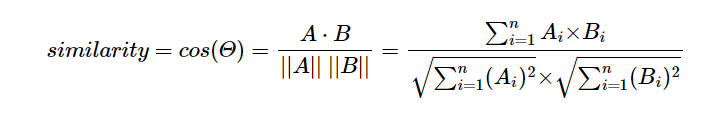

In [ ]:
parts = ['Noun']
all_words_df = pd.DataFrame()
satisfaction = []
for n in range(len(survey)):
  text = survey['comment'].iloc[n]
  words = twt.pos(text)
  words_df = pd.DataFrame()
  for i in words:
    if i == 'EOS' or i == '':continue
    word_tmp = i[0]
    part = i[1]
    if not (part in parts):continue
    words_df[word_tmp]=[1] #형태소로 나눈 것들은 모두 값을 1로 넣는다.
  all_words_df = pd.concat([all_words_df, words_df], ignore_index = True)

In [ ]:
all_words_df

,역앞,젊은이,운동,수,장소,것,육아,지원이,어린이집,바로,...,걸,야간,불안,고령자,운동장,잔디밭,아주,설문지,투고,놀이기구
0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN
80,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
all_words_df1 = all_words_df.fillna(0)
all_words_df1

,역앞,젊은이,운동,수,장소,것,육아,지원이,어린이집,바로,...,걸,야간,불안,고령자,운동장,잔디밭,아주,설문지,투고,놀이기구
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
80,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 코사인 유사도를 측정해서 유사한 리뷰 찾기

In [ ]:
survey = survey.dropna()

In [ ]:
survey

,datetime,comment,satisfaction,len
0,2019-03-11,역앞에 젊은이들이 모여있다,1,14
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5,21
2,2019-02-18,육아 지원이 좋다,5,9
3,2019-04-09,어린이집에 바로 입원할 수 있다,4,17
4,2019-01-06,역앞 상가가 쓸쓸하다,2,11
...,...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5,22
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2,26
83,2019-01-09,공원에 놀이기구가 너무 적다,1,15
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2,14


In [ ]:
#survey데이터의 두번째 코멘트를 타겟으로 설정
survey['comment'].iloc[1]
target_text = all_words_df1.iloc[1]
target_text

역앞         0.0
젊은이        0.0
운동         1.0
수          1.0
장소         1.0
          ... 
아주         0.0
설문지        0.0
투고         0.0
놀이기구       0.0
cos_sim    1.0
Name: 1, Length: 188, dtype: float64

In [ ]:
#타겟과 다른 문장들과의 코사인 유사도를 나타내는 컬럼 추가
import numpy as np
cos_sim = []
for i in range(len(all_words_df1)):
  cos_text = all_words_df1.iloc[i]
  cos = np.dot(target_text, cos_text) / (np.linalg.norm(target_text)*np.linalg.norm(cos_text))
  cos_sim.append(cos)

all_words_df1['cos_sim'] = cos_sim

In [ ]:
all_words_df1

,역앞,젊은이,운동,수,장소,것,육아,지원이,어린이집,바로,...,야간,불안,고령자,운동장,잔디밭,아주,설문지,투고,놀이기구,cos_sim
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.277350
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.000000
80,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.219083
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [ ]:
all_words_df1.sort_values('cos_sim',ascending=False)

,역앞,젊은이,운동,수,장소,것,육아,지원이,어린이집,바로,...,야간,불안,고령자,운동장,잔디밭,아주,설문지,투고,놀이기구,cos_sim
1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
36,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.785136
41,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.479938
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.415251
49,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.328207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
24,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
